How does a player on-field position affect their market value and frequency of transfers they experience? 

In [ ]:
import pandas as pd
import networkx as nx

# Load data
df = pd.read_excel("Transfer-Players-Clubs.xlsx")
p
# Create a directed graph 
G = nx.MultiDiGraph()

# Add nodes from 'from' and 'to' club columns with attributes
for _, row in df.iterrows():
    G.add_node(row['from_club_id'], club_id=row['from_club_id'], club_name=row['from_club_name'])
    G.add_node(row['to_club_id'], club_id=row['to_club_id'], club_name=row['to_club_name'])

# Add edges with attributes (allowing multiple transfers between the same clubs)
for _, row in df.iterrows():
    G.add_edge(
        row['from_club_id'],
        row['to_club_id'],
        player_name=row['player_name'],
        position=row['position']
    )

# Export to GEXF for Gephi
nx.write_gexf(G, "football_transfers_network_with_position.gexf")


In [21]:
import pandas as pd

# Load your dataset
df = pd.read_excel('Transfer-Players-Clubs.xlsx')
df['highest_market_value_in_eur'] = pd.to_numeric(df['highest_market_value_in_eur'], errors='coerce')
df['transfer_fee'] = pd.to_numeric(df['transfer_fee'], errors='coerce')
position_stats = df.groupby('position').agg(
    avg_market_value=('highest_market_value_in_eur', 'mean'),
    median_market_value=('highest_market_value_in_eur', 'median'),
    transfer_count=('player_id', 'count'),
    total_value=('transfer_fee', 'sum')
)

position_stats['network_centrality'] = position_stats['transfer_count'] / position_stats['transfer_count'].max()
position_stats['avg_market_value'] = position_stats['avg_market_value'].apply(lambda x: f'€{x / 1e6:.1f}M' if pd.notna(x) else '€0M')
position_stats['median_market_value'] = position_stats['median_market_value'].apply(lambda x: f'€{x / 1e6:.1f}M' if pd.notna(x) else '€0M')
position_stats['total_value'] = position_stats['total_value'].apply(lambda x: f'€{x / 1e9:.1f}B' if pd.notna(x) else '€0B')

print(position_stats[['avg_market_value', 'median_market_value', 'transfer_count', 'total_value', 'network_centrality']])


           avg_market_value median_market_value  transfer_count total_value  \
position                                                                      
Attack               €11.5M               €4.0M           11050      €21.4B   
Defender              €8.2M               €3.0M           11578      €15.0B   
Goalkeeper            €5.6M               €1.5M            3990       €2.5B   
Midfield             €10.5M               €4.0M            9770      €15.9B   
Missing                 €0M                 €0M               4       €0.0B   

            network_centrality  
position                        
Attack                0.954396  
Defender              1.000000  
Goalkeeper            0.344619  
Midfield              0.843842  
Missing               0.000345  


              count          mean           std      min       25%        50%  \
position                                                                        
Attack      11050.0  3.759474e+06  8.087300e+06  10000.0  300000.0  1000000.0   
Defender    11578.0  2.573706e+06  5.344006e+06  10000.0  200000.0   700000.0   
Goalkeeper   3990.0  1.489563e+06  3.668145e+06  10000.0  100000.0   350000.0   
Midfield     9770.0  3.456080e+06  7.160684e+06  10000.0  250000.0   800000.0   
Missing         4.0  1.375000e+04  7.500000e+03  10000.0   10000.0    10000.0   

                  75%          max  
position                            
Attack      3500000.0  180000000.0  
Defender    2500000.0   75000000.0  
Goalkeeper  1000000.0   65000000.0  
Midfield    3000000.0  120000000.0  
Missing       13750.0      25000.0  


C:\Users\Zawad Safwan\AppData\Local\Temp\ipykernel_73400\734161051.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='market_value_in_eur', data=df,


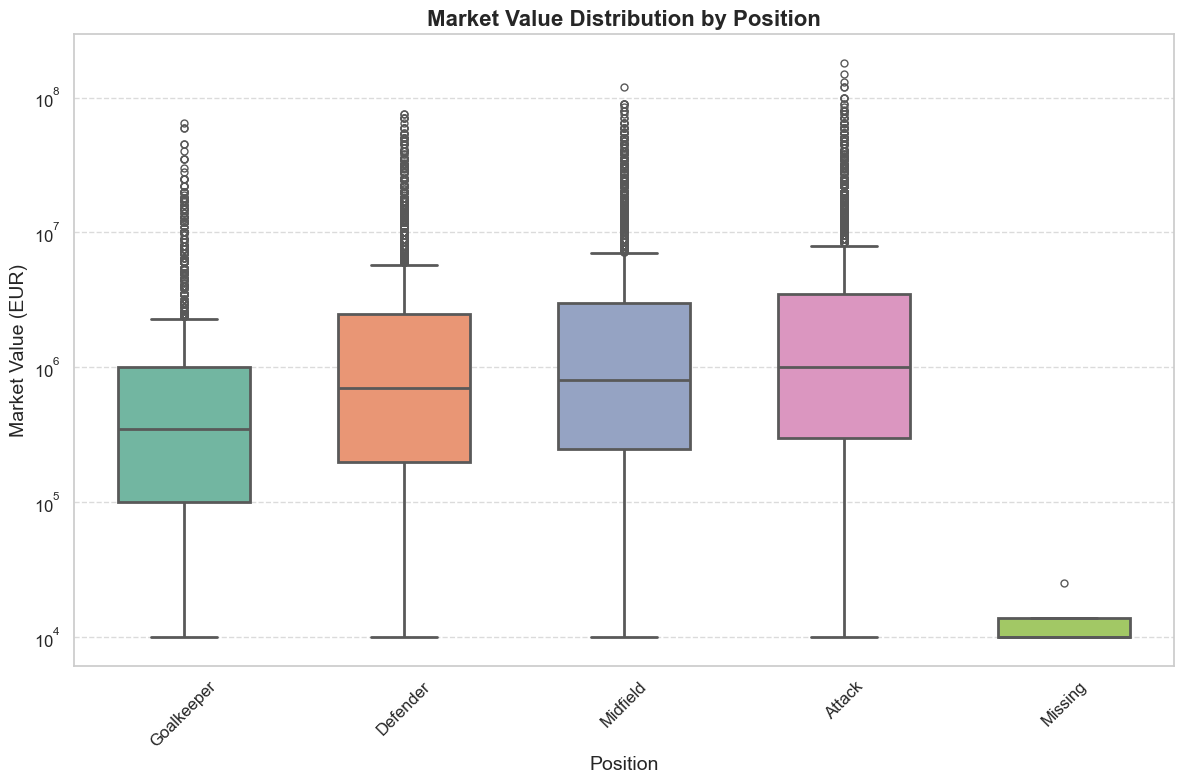

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('Transfer-Players-Clubs.xlsx')

# Remove rows where 'market_value_in_eur' is missing
df = df.dropna(subset=['market_value_in_eur'])

# Group by position and calculate the summary statistics for market values
position_market_value_stats = df.groupby('position')['market_value_in_eur'].describe()

# Print the summary statistics
print(position_market_value_stats)

# Set the style for the plot
sns.set(style="whitegrid")

# Plot a boxplot to show the distribution of market values by position
plt.figure(figsize=(12, 8))

# Customize the boxplot 
sns.boxplot(x='position', y='market_value_in_eur', data=df,
            palette='Set2', width=0.6, fliersize=5, linewidth=2)

# Add title 
plt.title('Market Value Distribution by Position', fontsize=16, fontweight='bold')

# Add axis labels with increased font size
plt.xlabel('Position', fontsize=14)
plt.ylabel('Market Value (EUR)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

plt.yscale('log')
plt.yticks(fontsize=12)

# Display gridlines for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
